In [1]:
from Nozzle_1D import Nozzle
temp = Nozzle("inputs.nml")
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%%bash 
gcc -shared -o c_functions.so -fPIC functions.c

In [3]:
p,u,rho = temp.compute_newton()

In [4]:
temp.set_arrays()
U = np.random.rand(*temp.U.shape)
V = temp.primitive_to_conserved(U)[0]
temp_U = temp.conserved_to_primitive(V)

In [5]:
temp.set_geometry()
temp.set_initial_conditions()
temp.set_boundary_conditions()

R1 = temp.iteration_step()
temp.set_boundary_conditions()


In [6]:
R1

array([5.50631028e-02, 4.15888741e+01, 3.31846318e+04])

print(temp.V)

1.0013793489270515
0.8325982416206601
0.7174965435337836
0.6519275248074213
0.6192025167644983
0.5838805643020027
0.5140576417672956
0.4554899903037798
0.43539978042928323
0.4117262067335332
0.4354386130544439
0.4773052908613071
0.501825198351169
0.4786626621577507
0.44245994251143406
0.3520947335980366
0.3111547423529615
0.26952251460932586
0.22857746598519008
0.18998272442390804
0.17770073113498025
0.18531944156938884
0.1859789999669486
0.18083536258218025
0.17092137642540361
0.1557126662633093
0.13645353734125507
0.11876191409517654
0.10457540656455687
0.09875092157247747
0.09226426660268267
0.08281271195764593
0.0710266389650194
0.06656617660174942
0.06487633951278958
0.06119411761783566
0.055691189301304095
0.04873155807366813
0.04089139476703159
0.04227967943190078
0.04369844414994458
0.04310181887132549
0.04065851740326179
0.03681265775114547
0.03214732248326963
0.027300709518229722
0.028158503413625365
0.027794811260122537
0.026191886757884576
0.02355941867779682
0.020214192493

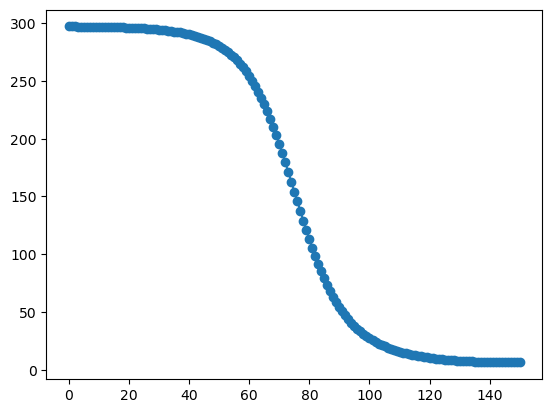

In [7]:
convergence_history = []
for i in range(30000):
    
    R = temp.iteration_step()
    if i%100 == 0:
        print(np.max(R/R1))
        convergence_history.append(R/R1)
    temp.set_boundary_conditions()
    if np.any(R/R1)<.00001:
        print("Converged")
        break
p_compute = temp.V[:,2]
u_compute = temp.V[:,1]
rho_compute = temp.V[:,0]
plt.plot(p_compute[1:],"-o")


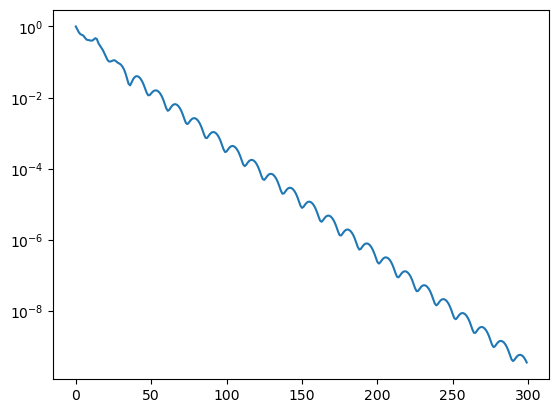

In [8]:
ch = np.array(convergence_history)
plt.semilogy(ch[:,0])